# Titanic Project

Problem Statement:
    
     The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

Target:
    
    Survived column is the target variable, it has the details whether the passengers are survived or not.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('TitanicTrain.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.shape

(891, 12)

# Checking Null Values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have null values for Age, Cabin and Embarked. We are going to fill this with mean values or mode values.

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

This Age column is continuous Numeric Values so that we are filling null values with mean of the column.

For Cabin column it has Nominal datas, so that we can drop that column from the dataset.

In [10]:
df=df.drop(columns="Cabin", axis=1)

For Age column the values are categorical column, so that we can fill it with mode values.

First check which categorical data is most repeated value.

In [11]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
print(df['Embarked'].mode()[0])

S


Replacing missing values in "Embarked" column with mode value.

In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Checking Null Values again

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Null values are replaced successfully.

<AxesSubplot:>

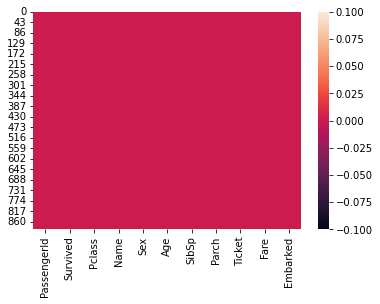

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum().sum()

0

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [18]:
df.shape

(891, 11)

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# DataFrame Description

The dataset contains the data of PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked.

Survived column is the target column with two values 0 and 1. 0 means not surviving, 1 means surviving.

# Summary Statistics

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


There is large difference between 75th percentile and max for fare column.

Mean is higher for Fare column compared to median.

# Checking value counts

In [22]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

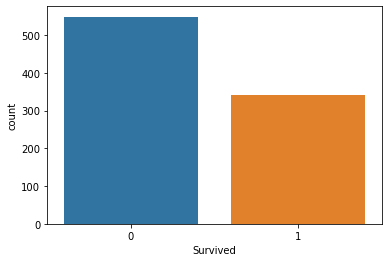

In [23]:
sns.countplot(df['Survived'])

Here we saw that counts shown that 549 passengers not survived, 342 passengers are survived.

<AxesSubplot:xlabel='Sex', ylabel='count'>

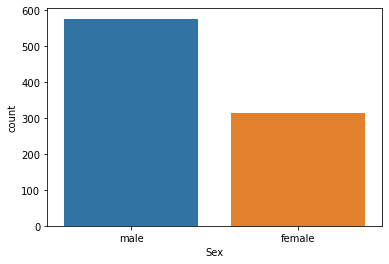

In [24]:
sns.countplot(df['Sex'])

Lets compare No of passengers survived with gender of the passengers.

<AxesSubplot:xlabel='Sex', ylabel='count'>

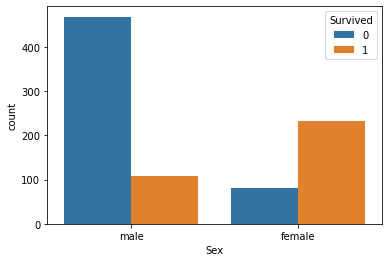

In [25]:
sns.countplot('Sex', hue='Survived', data=df)

This countplot shows that No.of female passengers are survived more than male.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

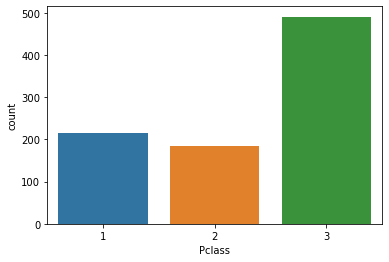

In [26]:
sns.countplot(df['Pclass'], data=df)

The above plot shows that 3rd class passengers are more when compared to first class and 2nd class.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

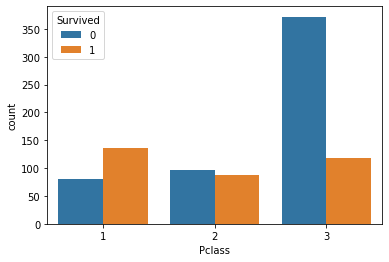

In [27]:
sns.countplot('Pclass', hue='Survived', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

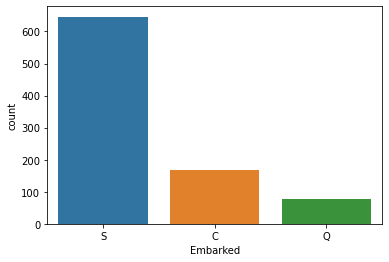

In [28]:
sns.countplot('Embarked', data=df)

# Encoding

In [29]:
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,190,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,353,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,272,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,15,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,303,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,413,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,81,male,26.000000,0,0,111369,30.0000,C


In [30]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,190,0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,353,0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,272,0,35.000000,1,0,113803,53.1000,S
4,5,0,3,15,1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,211536,13.0000,S
887,888,1,1,303,0,19.000000,0,0,112053,30.0000,S
888,889,0,3,413,0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,81,1,26.000000,0,0,111369,30.0000,C


In [31]:
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,190,0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,353,0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,272,0,35.000000,1,0,113803,53.1000,2
4,5,0,3,15,1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,211536,13.0000,2
887,888,1,1,303,0,19.000000,0,0,112053,30.0000,2
888,889,0,3,413,0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,81,1,26.000000,0,0,111369,30.0000,0


In [32]:
le=LabelEncoder()
df['Ticket']=le.fit_transform(df['Ticket'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,0


Encoding Name, Sex, Ticket and Embarked columns using LabelEncoder.

# Plottings

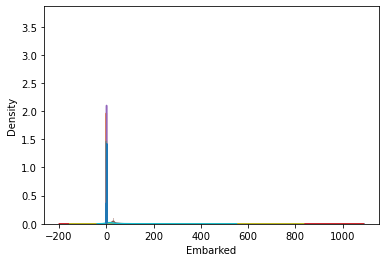

In [33]:
for i in df.columns:
    sns.distplot(df[i])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

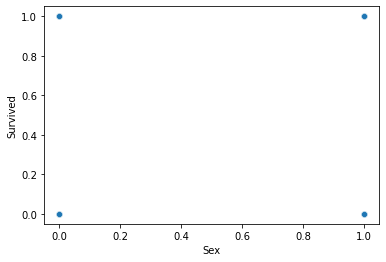

In [34]:
sns.scatterplot(x="Sex", y="Survived", data=df)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

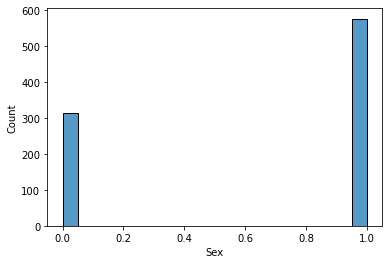

In [35]:
sns.histplot(df['Sex'], bins=20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

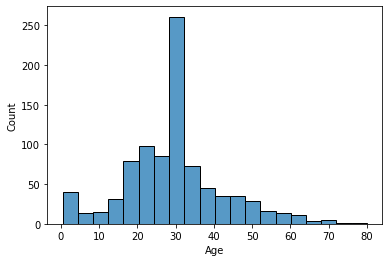

In [36]:
sns.histplot(df['Age'], bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

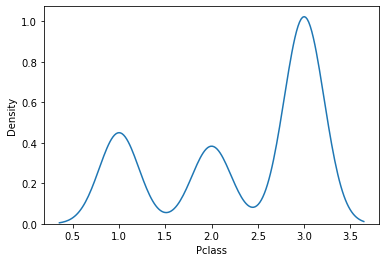

In [37]:
sns.kdeplot(df['Pclass'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

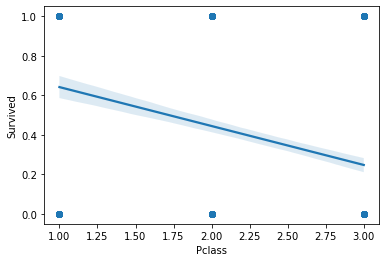

In [38]:
sns.regplot(x='Pclass', y='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Embarked'>

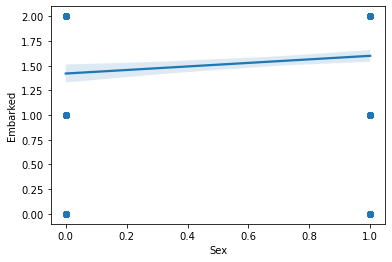

In [39]:
sns.regplot(x='Sex', y='Embarked', data=df)

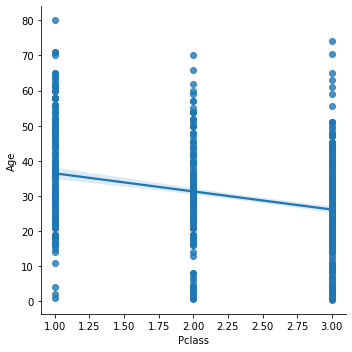

In [40]:
sns.lmplot(x='Pclass', y='Age',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

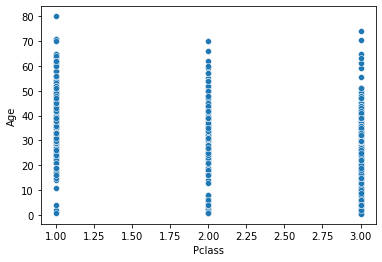

In [41]:
sns.scatterplot(x='Pclass', y='Age',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Embarked'>

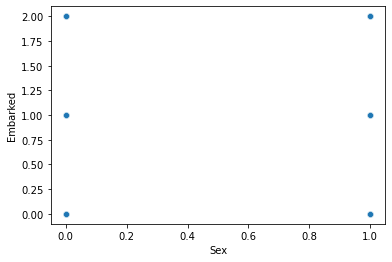

In [42]:
sns.scatterplot(x='Sex', y='Embarked', data=df)

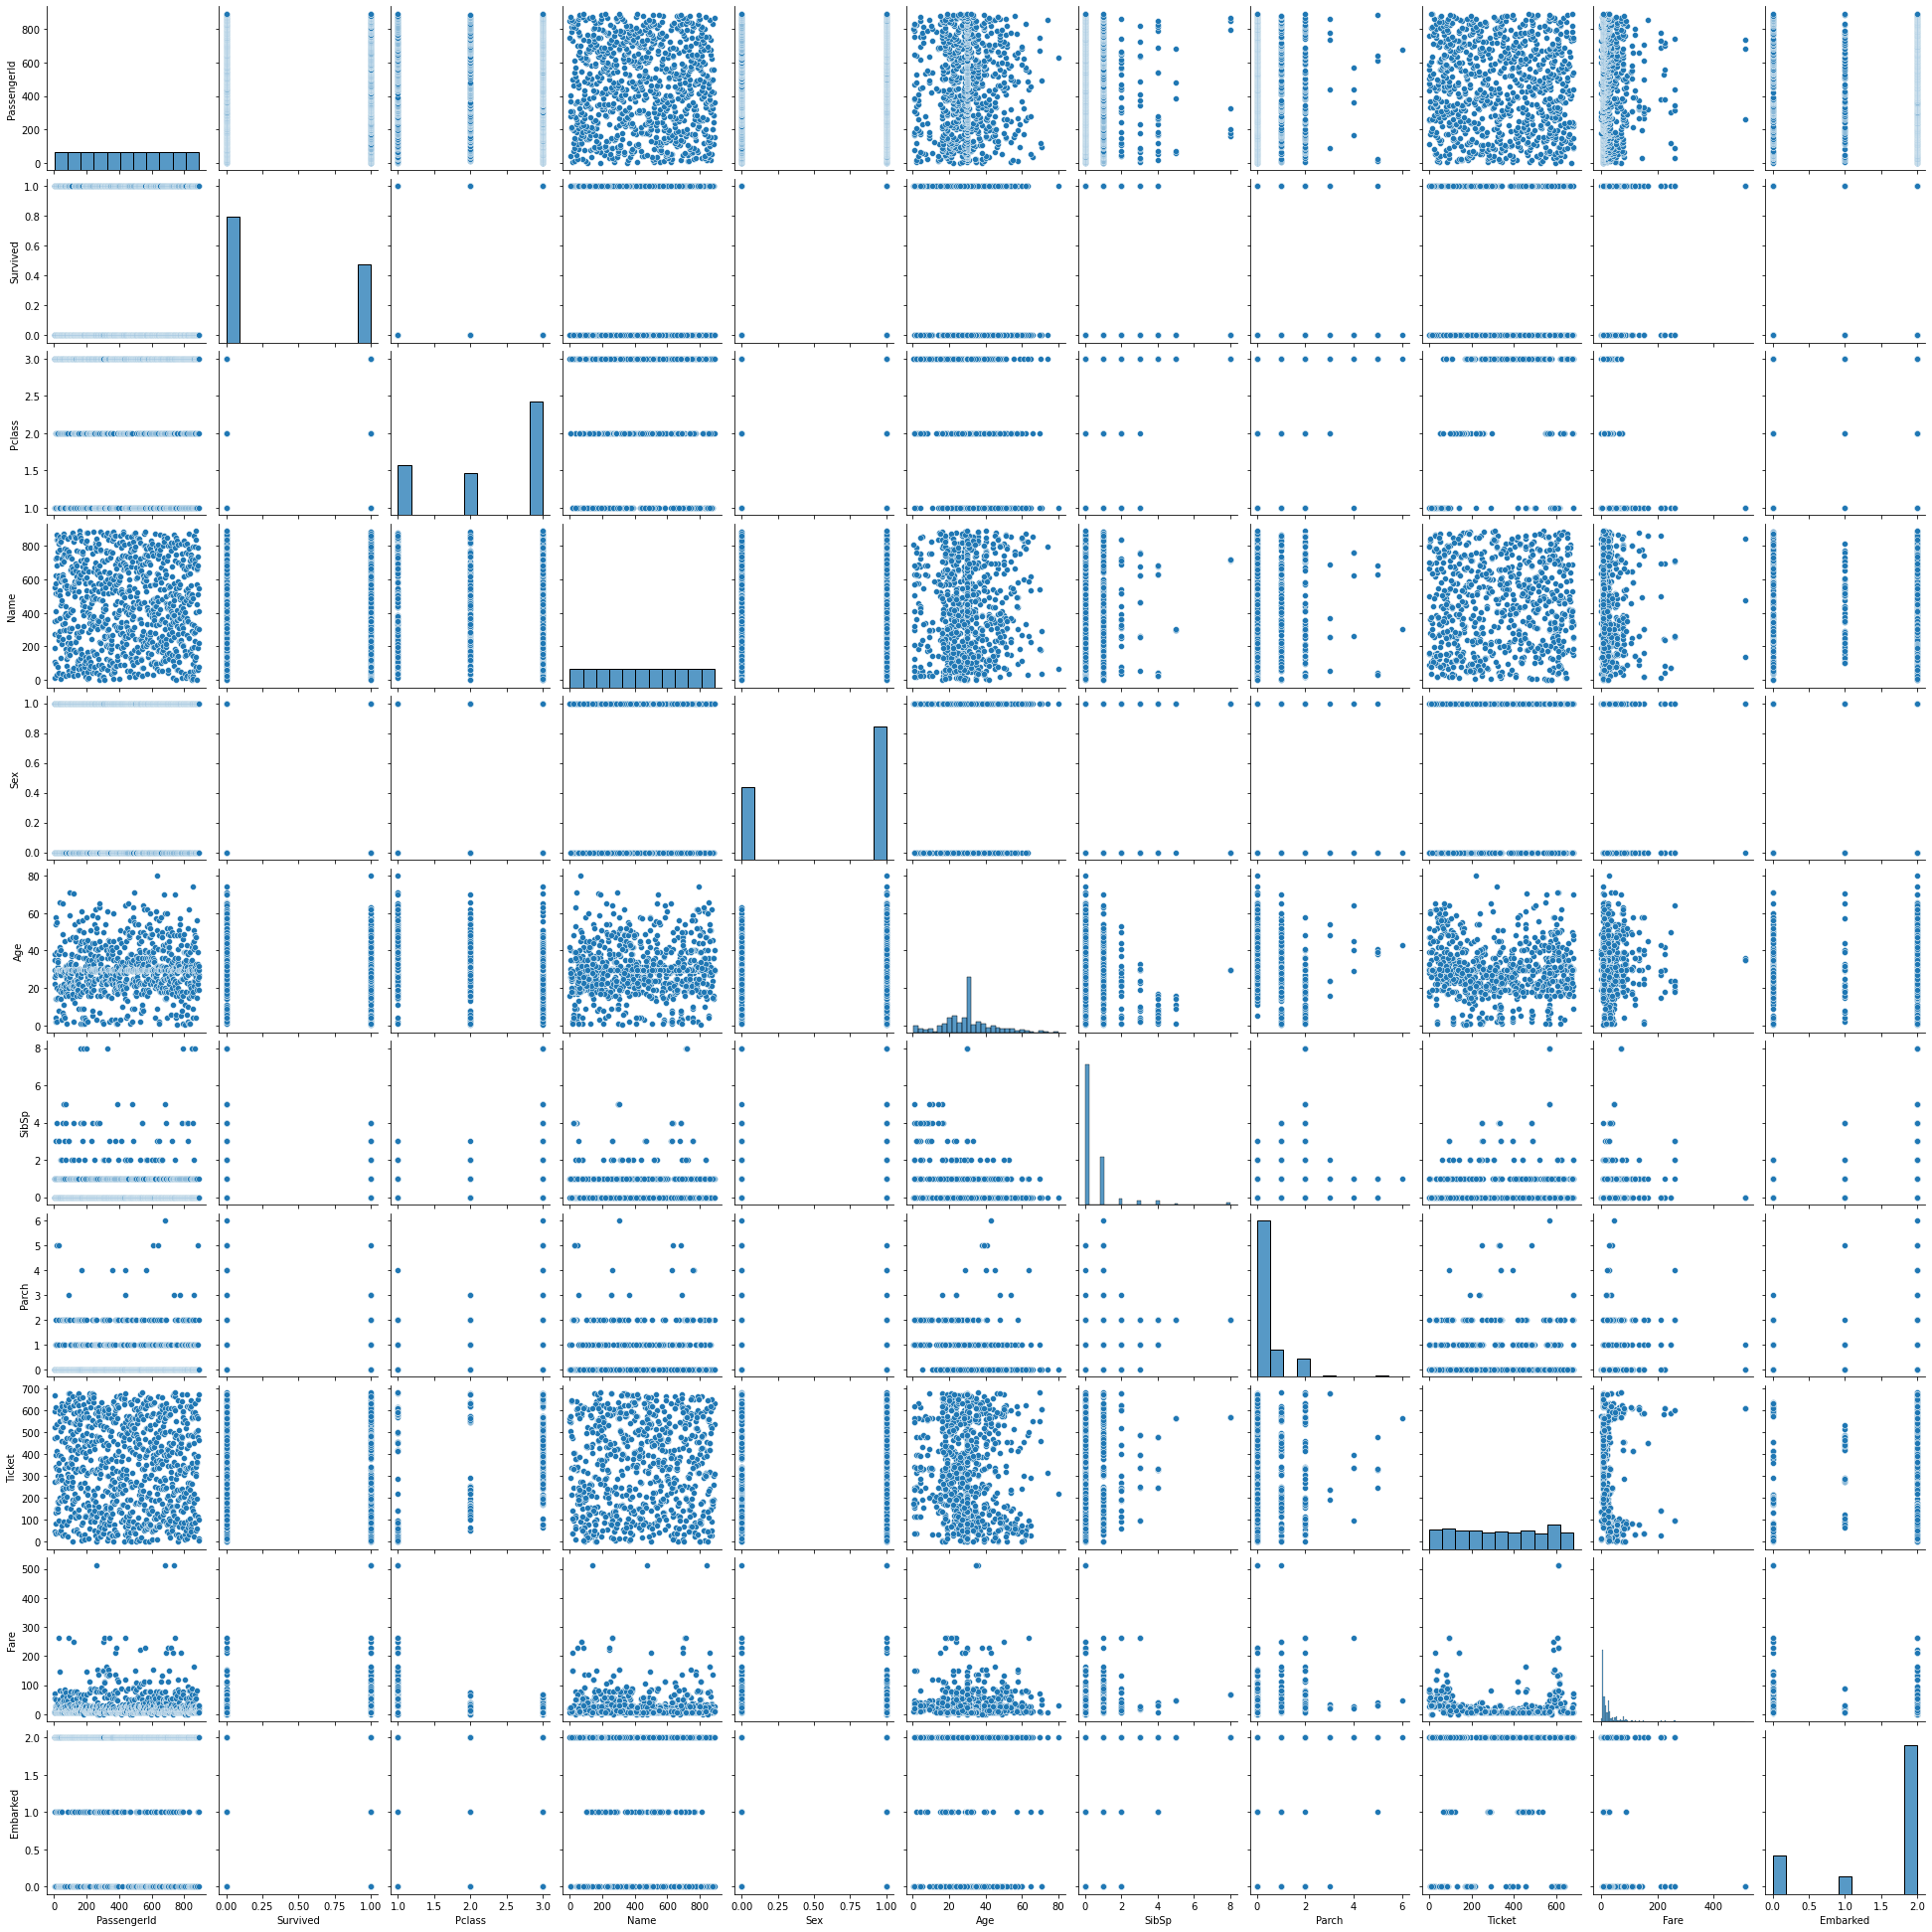

In [43]:
sns.pairplot(df)

# Skewness

In [44]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

Skewness of Fare, SinSp is high so we use sqrt transformation method.

In [45]:
import numpy as np

df['Fare']=np.sqrt(df['Fare'])
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           2.085004
Embarked      -1.264823
dtype: float64

In [46]:
df['SibSp']=np.sqrt(df['SibSp'])
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          1.436526
Parch          2.749117
Ticket         0.000246
Fare           2.085004
Embarked      -1.264823
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

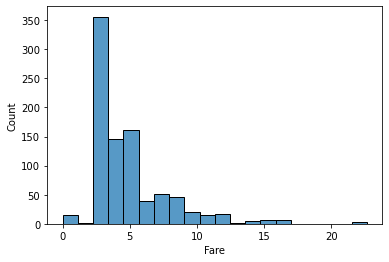

In [47]:
sns.histplot(df['Fare'], bins=20)

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

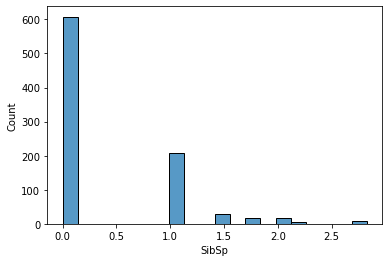

In [48]:
sns.histplot(df['SibSp'], bins=20)

# Outliers Check

<AxesSubplot:>

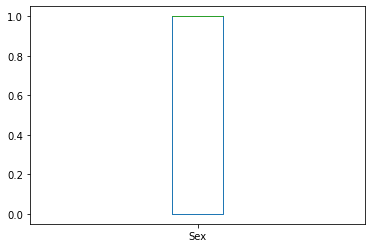

In [49]:
df['Sex'].plot.box()

<AxesSubplot:>

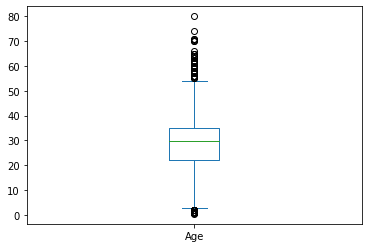

In [50]:
df['Age'].plot.box()

<AxesSubplot:>

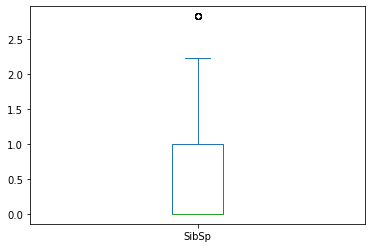

In [51]:
df['SibSp'].plot.box()

<AxesSubplot:>

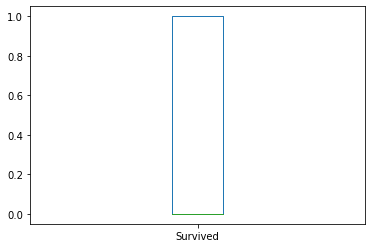

In [52]:
df['Survived'].plot.box()

<AxesSubplot:>

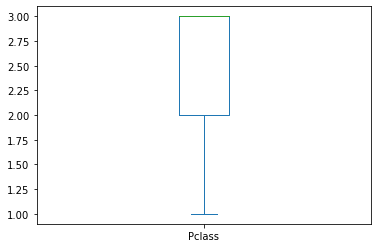

In [53]:
df['Pclass'].plot.box()

The above plots shows that we have outliers to remove.

# Removing Outliers

In [54]:
from scipy.stats import zscore

dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 13,  25,  27,  59,  71,  86,  88,  96, 116, 118, 159, 167, 180,
       201, 258, 299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438,
       480, 493, 527, 557, 567, 610, 630, 638, 672, 678, 679, 683, 689,
       700, 716, 730, 736, 737, 742, 745, 774, 779, 792, 846, 851, 858,
       863, 885], dtype=int64), array([7, 7, 9, 6, 6, 7, 9, 5, 5, 9, 6, 7, 6, 6, 9, 9, 9, 6, 9, 7, 9, 9,
       6, 7, 7, 9, 6, 5, 9, 9, 7, 7, 5, 7, 5, 7, 9, 6, 9, 9, 9, 9, 7, 9,
       9, 5, 7, 9, 6, 6, 5, 7, 6, 7], dtype=int64))


In [55]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (838, 11)


In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.000000,1.0,0,523,2.692582,2
1,2,1,1,190,0,38.000000,1.0,0,596,8.442944,0
2,3,1,3,353,0,26.000000,0.0,0,669,2.815138,2
3,4,1,1,272,0,35.000000,1.0,0,49,7.286975,2
4,5,0,3,15,1,35.000000,0.0,0,472,2.837252,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0.0,0,101,3.605551,2
887,888,1,1,303,0,19.000000,0.0,0,14,5.477226,2
888,889,0,3,413,0,29.699118,1.0,2,675,4.842520,2
889,890,1,1,81,1,26.000000,0.0,0,8,5.477226,0


In [57]:
df.shape

(838, 11)

53 rows are deleted during removal of outliers.

# Correlation of the columns with target variable

In [58]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.016669,-0.031501,-0.050041,0.064082,0.017012,-0.055658,-0.004149,-0.065452,-0.009880,0.018760
Survived,-0.016669,1.000000,-0.325269,-0.047750,-0.549636,-0.068450,0.090720,0.174143,-0.159273,0.350076,-0.153895
Pclass,-0.031501,-0.325269,1.000000,0.036404,0.135908,-0.345083,-0.036648,-0.036447,0.349311,-0.713107,0.126093
Name,-0.050041,-0.047750,0.036404,1.000000,0.021981,0.080925,-0.096832,-0.059811,0.055993,-0.051770,-0.017248
Sex,0.064082,-0.549636,0.135908,0.021981,1.000000,0.087761,-0.186671,-0.247175,0.064531,-0.257057,0.110845
Age,0.017012,-0.068450,-0.345083,0.080925,0.087761,1.000000,-0.222421,-0.316320,-0.091012,0.131674,-0.019158
SibSp,-0.055658,0.090720,-0.036648,-0.096832,-0.186671,-0.222421,1.000000,0.391802,-0.015163,0.347112,-0.017364
Parch,-0.004149,0.174143,-0.036447,-0.059811,-0.247175,-0.316320,0.391802,1.000000,-0.024394,0.294390,0.003343
Ticket,-0.065452,-0.159273,0.349311,0.055993,0.064531,-0.091012,-0.015163,-0.024394,1.000000,-0.182536,0.025977
Fare,-0.009880,0.350076,-0.713107,-0.051770,-0.257057,0.131674,0.347112,0.294390,-0.182536,1.000000,-0.191139


<AxesSubplot:>

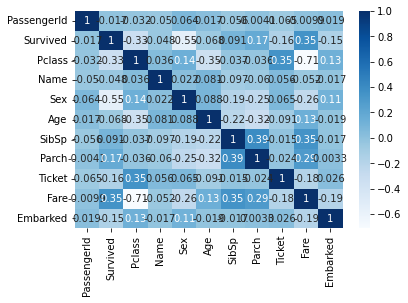

In [59]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

# Multicollenarity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
features=df.drop("Survived", axis=1)
features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,22.000000,1.0,0,523,2.692582,2
1,2,1,190,0,38.000000,1.0,0,596,8.442944,0
2,3,3,353,0,26.000000,0.0,0,669,2.815138,2
3,4,1,272,0,35.000000,1.0,0,49,7.286975,2
4,5,3,15,1,35.000000,0.0,0,472,2.837252,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.000000,0.0,0,101,3.605551,2
887,888,1,303,0,19.000000,0.0,0,14,5.477226,2
888,889,3,413,0,29.699118,1.0,2,675,4.842520,2
889,890,1,81,1,26.000000,0.0,0,8,5.477226,0


In [62]:
target=df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 838, dtype: int64

In [63]:
features.shape

(838, 10)

In [64]:
features.shape[1]

10

In [65]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    vif["features"]=features.columns
    print(vif)

In [66]:
vif_calc()

   VIF Factor     features
0    3.870166  PassengerId
1    9.250906       Pclass
2    4.022969         Name
3    3.196641          Sex
4    7.054862          Age
5    1.923000        SibSp
6    1.716349        Parch
7    4.389947       Ticket
8    6.230754         Fare
9    4.766764     Embarked


As we see VIF of Pclass, Age and Fare is more than 5, so that we can drop that columns.

In [67]:
df.drop(['Pclass','Age', 'Fare'], axis=1, inplace=True)
df

,PassengerId,Survived,Name,Sex,SibSp,Parch,Ticket,Embarked
0,1,0,108,1,1.0,0,523,2
1,2,1,190,0,1.0,0,596,0
2,3,1,353,0,0.0,0,669,2
3,4,1,272,0,1.0,0,49,2
4,5,0,15,1,0.0,0,472,2
...,...,...,...,...,...,...,...,...
886,887,0,548,1,0.0,0,101,2
887,888,1,303,0,0.0,0,14,2
888,889,0,413,0,1.0,2,675,2
889,890,1,81,1,0.0,0,8,0


In [68]:
features=df.drop("Survived", axis=1)
features

,PassengerId,Name,Sex,SibSp,Parch,Ticket,Embarked
0,1,108,1,1.0,0,523,2
1,2,190,0,1.0,0,596,0
2,3,353,0,0.0,0,669,2
3,4,272,0,1.0,0,49,2
4,5,15,1,0.0,0,472,2
...,...,...,...,...,...,...,...
886,887,548,1,0.0,0,101,2
887,888,303,0,0.0,0,14,2
888,889,413,0,1.0,2,675,2
889,890,81,1,0.0,0,8,0


In [69]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    vif["features"]=features.columns
    print(vif)

In [70]:
vif_calc()

   VIF Factor     features
0    3.207274  PassengerId
1    3.239751         Name
2    2.930892          Sex
3    1.595718        SibSp
4    1.485681        Parch
5    3.239531       Ticket
6    3.988150     Embarked


<AxesSubplot:>

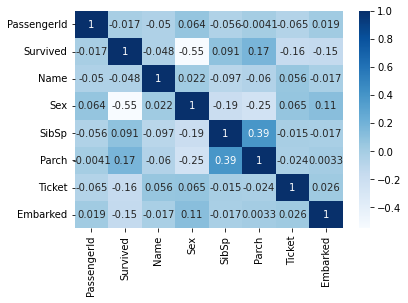

In [71]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)

# Scaling Technique

In [72]:
scale=StandardScaler()
features=scale.fit_transform(features)
features

array([[-1.73164456, -1.32615053,  0.72171403, ..., -0.4758374 ,
         0.96016002,  0.5806517 ],
       [-1.72773868, -1.00577337, -1.38559035, ..., -0.4758374 ,
         1.32654389, -1.97360617],
       [-1.72383279, -0.36892608, -1.38559035, ..., -0.4758374 ,
         1.69292775,  0.5806517 ],
       ...,
       [ 1.73678094, -0.13450377, -1.38559035, ...,  2.90341464,
         1.72304149,  0.5806517 ],
       [ 1.74068682, -1.43164057,  0.72171403, ..., -0.4758374 ,
        -1.62460286, -1.97360617],
       [ 1.74459271, -0.88856221,  0.72171403, ..., -0.4758374 ,
         0.67407947, -0.69647723]])

In [73]:
features.shape

(838, 7)

# Finding best random_state

In [74]:
maxAccu=0
maxRS=0

for i in range(1,200):
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.20, random_state=i)
    LR=LogisticRegression()
    LR.fit(features_train, target_train)
    predrf=LR.predict(features_test)
    acc=accuracy_score(target_test, predrf)
    print('testing accuracy', acc, 'random_state', i)

    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu, 'max_random_state', i)

testing accuracy 0.7976190476190477 random_state 1
max_accuracy 0.7976190476190477 max_random_state 1
testing accuracy 0.7797619047619048 random_state 2
testing accuracy 0.8273809523809523 random_state 3
max_accuracy 0.8273809523809523 max_random_state 3
testing accuracy 0.7619047619047619 random_state 4
testing accuracy 0.7916666666666666 random_state 5
testing accuracy 0.7857142857142857 random_state 6
testing accuracy 0.8214285714285714 random_state 7
testing accuracy 0.7916666666666666 random_state 8
testing accuracy 0.7797619047619048 random_state 9
testing accuracy 0.8154761904761905 random_state 10
testing accuracy 0.8214285714285714 random_state 11
testing accuracy 0.8154761904761905 random_state 12
testing accuracy 0.7797619047619048 random_state 13
testing accuracy 0.7440476190476191 random_state 14
testing accuracy 0.8392857142857143 random_state 15
max_accuracy 0.8392857142857143 max_random_state 15
testing accuracy 0.7916666666666666 random_state 16
testing accuracy 0.8035

In [75]:
print("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.8690476190476191 on Random_state 97


# Creating train_test_split

In [76]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.20,random_state=97)

In [77]:
features_train.shape

(670, 7)

In [78]:
target_train.shape

(670,)

In [79]:
features_test.shape

(168, 7)

In [80]:
target_test.shape

(168,)

# Logistic Regression

In [81]:
LR=LogisticRegression()
LR.fit(features_train, target_train)
predlr=LR.predict(features_test)
print("Accuaracy", accuracy_score(target_test, predlr)*100)
print(confusion_matrix(target_test,predlr))
print(classification_report(target_test,predlr))

Accuaracy 86.90476190476191
[[98 15]
 [ 7 48]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       113
           1       0.76      0.87      0.81        55

    accuracy                           0.87       168
   macro avg       0.85      0.87      0.86       168
weighted avg       0.88      0.87      0.87       168



# Decision Tree Classifier

In [82]:
dt=DecisionTreeClassifier()
dt.fit(features_train, target_train)
preddt=dt.predict(features_test)
pred_train_dtc=dt.predict(features_train)
print("Testing Accuaracy", accuracy_score(target_test, preddt)*100)  # testing accuarcy
print("Training Accuaracy", accuracy_score(target_train, pred_train_dtc)*100)  # training accuracy
print(confusion_matrix(target_test,preddt))
print(classification_report(target_test,preddt))

Testing Accuaracy 79.76190476190477
Training Accuaracy 100.0
[[91 22]
 [12 43]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       113
           1       0.66      0.78      0.72        55

    accuracy                           0.80       168
   macro avg       0.77      0.79      0.78       168
weighted avg       0.81      0.80      0.80       168



# KNeighbours Classifier

In [83]:
kn=KNeighborsClassifier()
kn.fit(features_train, target_train)
predkn=kn.predict(features_test)
pred_train_knc=kn.predict(features_train)
print("Testing Accuaracy", accuracy_score(target_test, predkn)*100)  # testing accuarcy
print("Training Accuaracy", accuracy_score(target_train, pred_train_knc)*100)  # training accuracy
print(confusion_matrix(target_test,predkn))
print(classification_report(target_test,predkn))

Testing Accuaracy 83.33333333333334
Training Accuaracy 82.38805970149254
[[96 17]
 [11 44]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       113
           1       0.72      0.80      0.76        55

    accuracy                           0.83       168
   macro avg       0.81      0.82      0.82       168
weighted avg       0.84      0.83      0.84       168



In [84]:
sv=SVC()
sv.fit(features_train, target_train)
predsv=sv.predict(features_test)
pred_train_svc=sv.predict(features_train)
print("Testing Accuaracy", accuracy_score(target_test, predsv)*100)  # testing accuarcy
print("Training Accuaracy", accuracy_score(target_train, pred_train_svc)*100)  # training accuracy
print(confusion_matrix(target_test,predsv))
print(classification_report(target_test,predsv))

Testing Accuaracy 87.5
Training Accuaracy 80.44776119402985
[[100  13]
 [  8  47]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       113
           1       0.78      0.85      0.82        55

    accuracy                           0.88       168
   macro avg       0.85      0.87      0.86       168
weighted avg       0.88      0.88      0.88       168



# Ensemble Technique

# Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(features_train, target_train)
predrf=rf.predict(features_test)
print("Accuaracy", accuracy_score(target_test, predrf)*100)  # testing accuracy
print(confusion_matrix(target_test,predrf))
print(classification_report(target_test,predrf))

Accuaracy 90.47619047619048
[[102  11]
 [  5  50]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       113
           1       0.82      0.91      0.86        55

    accuracy                           0.90       168
   macro avg       0.89      0.91      0.89       168
weighted avg       0.91      0.90      0.91       168



Logistic Regression, Random Forest and SVC are producing good accuracy. Lets check cross validation.

# Cross Validation

In [86]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, features, target, cv=5)
print("Cross validation score of Logistic Regression model:", scr.mean())

Cross validation score of Logistic Regression model: 0.7911676646706587


In [87]:
scr

array([0.80357143, 0.80952381, 0.76190476, 0.78443114, 0.79640719])

In [88]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt, features, target, cv=5)
print("Cross validation score of Decision Tree model:", scr.mean())

Cross validation score of Decision Tree model: 0.7375035642999714


In [89]:
scr

array([0.68452381, 0.74404762, 0.75595238, 0.7005988 , 0.80239521])

In [90]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(kn, features, target, cv=5)
print("Cross validation score of KNeighbours model:", scr.mean())

Cross validation score of KNeighbours model: 0.7661106358711148


In [91]:
scr

array([0.78571429, 0.7797619 , 0.73214286, 0.76047904, 0.77245509])

In [92]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(sv, features, target, cv=5)
print("Cross validation score of KNeighbours model:", scr.mean())

Cross validation score of KNeighbours model: 0.8054890219560878


In [93]:
scr

array([0.80952381, 0.82142857, 0.78571429, 0.80239521, 0.80838323])

In [94]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, features, target, cv=5)
print("Cross validation score of Random Forest model:", scr.mean())

Cross validation score of Random Forest model: 0.7911391502708869


In [95]:
RandomForestClassifier()

RandomForestClassifier()

In [96]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [97]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [99]:
GCV.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [101]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 200}

In [102]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [103]:
RandomForestClassifier()

RandomForestClassifier()

In [104]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=200)

In [107]:
GCV_pred=GCV.best_estimator_.predict(features_test)
accuracy_score(target_test,GCV_pred)

0.8809523809523809

# ROC AUC Plot

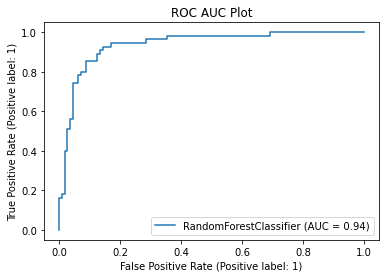

In [108]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,features_test,target_test)
plt.title("ROC AUC Plot")
plt.show()